In [1]:
!pip3 install --upgrade xlrd
!pip3 install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.9 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0:
      Successfully uninstalled xlrd-1.2.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [119]:
full_df = pd.read_excel("/content/drive/MyDrive/UPenn/*SENIOR_YEAR/classes/546/546 Project/data/default of credit card clients.xlsx", header=1)
#full_df = pd.read_excel('/content/data/default of credit card clients.xlsx', header=1)

In [120]:
df = full_df.copy()
df['default payment next month'].value_counts()

0.0    23364
1.0     6636
Name: default payment next month, dtype: int64

In [121]:
#upsampled
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(df.drop(['default payment next month'], axis=1), df['default payment next month'])

print(Counter(df['default payment next month'].values.ravel()))
print(Counter(y_train_smote.values.ravel()))

Counter({0.0: 23364, 1.0: 6636})
Counter({1.0: 23364, 0.0: 23364})


In [122]:
df = pd.merge(X_train_smote, y_train_smote, left_index=True, right_index=True)
df['default payment next month'].value_counts()

1.0    23364
0.0    23364
Name: default payment next month, dtype: int64

In [123]:
from sklearn.utils import resample
ones = df[df["default payment next month"] == 1]
zeros  = df[df["default payment next month"] == 0]

zeroes_downsample = resample(zeros,
             replace=True,
             n_samples=int(len(ones)*0.20),
             random_state=42)

print(zeroes_downsample.shape)

(4672, 25)


In [124]:
df = pd.concat([ones, zeroes_downsample])

In [125]:
df = df.copy()
df['default payment next month'].value_counts()

1.0    23364
0.0     4672
Name: default payment next month, dtype: int64

In [126]:
df['default payment next month']

0        1.0
1        1.0
13       1.0
16       1.0
21       1.0
        ... 
18206    0.0
10834    0.0
28672    0.0
15886    0.0
18707    0.0
Name: default payment next month, Length: 28036, dtype: float64

In [127]:
df['Closeness_6'] = ((df.LIMIT_BAL - df.BILL_AMT6) / df.LIMIT_BAL).astype(float)
df['Closeness_5'] = ((df.LIMIT_BAL - df.BILL_AMT5) / df.LIMIT_BAL).astype(float)
df['Closeness_4'] = ((df.LIMIT_BAL - df.BILL_AMT4) / df.LIMIT_BAL).astype(float)
df['Closeness_3'] = ((df.LIMIT_BAL - df.BILL_AMT3) / df.LIMIT_BAL).astype(float)
df['Closeness_2'] = ((df.LIMIT_BAL - df.BILL_AMT2) / df.LIMIT_BAL).astype(float)
df['Closeness_1'] = ((df.LIMIT_BAL - df.BILL_AMT1) / df.LIMIT_BAL).astype(float)

In [128]:
df['Client_6'] = 1
df['Client_5'] = 1
df['Client_4'] = 1
df['Client_3'] = 1
df['Client_2'] = 1
df['Client_1'] = 1
df.loc[((df.PAY_6 == 0) & (df.BILL_AMT6 == 0) & (df.PAY_AMT6 == 0)) , 'Client_6'] = 0
df.loc[((df.PAY_5 == 0) & (df.BILL_AMT5 == 0) & (df.PAY_AMT5 == 0)) , 'Client_5'] = 0
df.loc[((df.PAY_4 == 0) & (df.BILL_AMT4 == 0) & (df.PAY_AMT4 == 0)) , 'Client_4'] = 0
df.loc[((df.PAY_3 == 0) & (df.BILL_AMT3 == 0) & (df.PAY_AMT3 == 0)) , 'Client_3'] = 0
df.loc[((df.PAY_2 == 0) & (df.BILL_AMT2 == 0) & (df.PAY_AMT2 == 0)) , 'Client_2'] = 0
df.loc[((df.PAY_1 == 0) & (df.BILL_AMT1 == 0) & (df.PAY_AMT1 == 0)) , 'Client_1'] = 0

In [129]:
df['Avg_exp_6'] = ((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5']))) / df['LIMIT_BAL']
df['Avg_exp_5'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4']))) / 2) / df['LIMIT_BAL']
df['Avg_exp_4'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4'])) +
                 (df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3']))) / 3) / df['LIMIT_BAL']
df['Avg_exp_3'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4'])) +
                 (df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3'])) +
                 (df['BILL_AMT2'] - (df['BILL_AMT3'] - df['PAY_AMT2']))) / 4) / df['LIMIT_BAL']
df['Avg_exp_2'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4'])) +
                 (df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3'])) +
                 (df['BILL_AMT2'] - (df['BILL_AMT3'] - df['PAY_AMT2'])) +
                 (df['BILL_AMT1'] - (df['BILL_AMT2'] - df['PAY_AMT1']))) / 5) / df['LIMIT_BAL']

df['Avg_exp_1']  = df['BILL_AMT1'] / df['LIMIT_BAL']

In [130]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Client_1']
nbe_features = [i for i in df.columns if i not in categorical_features and i != 'ID' and i != 'default payment next month']

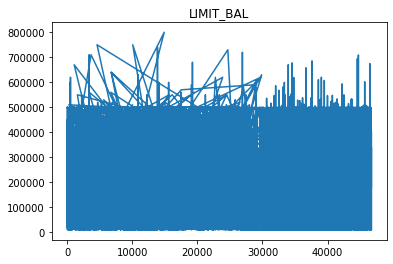

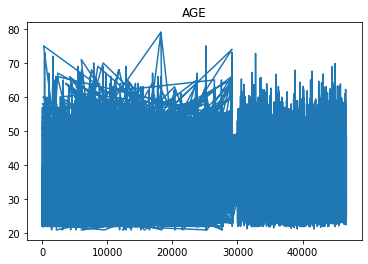

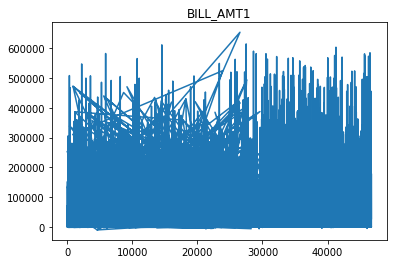

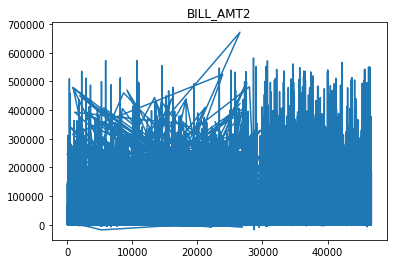

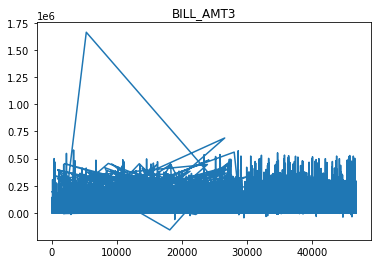

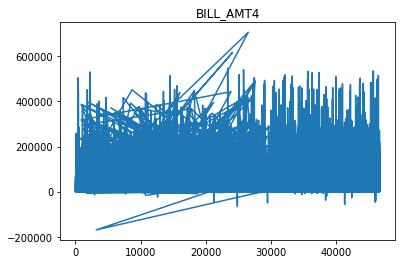

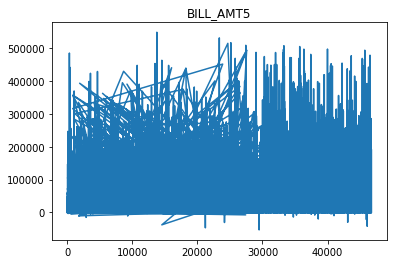

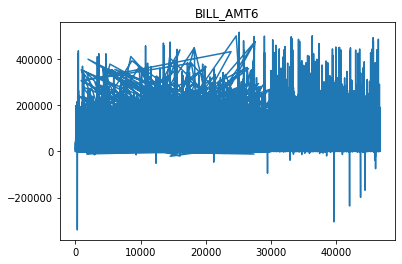

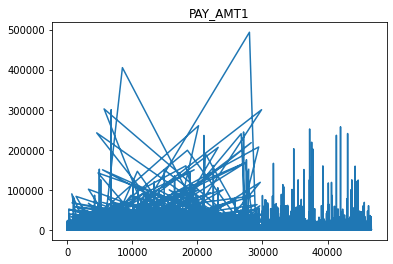

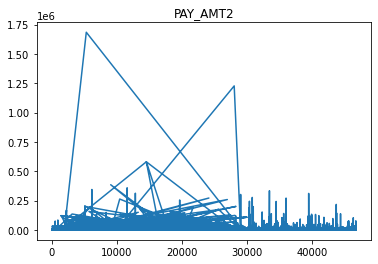

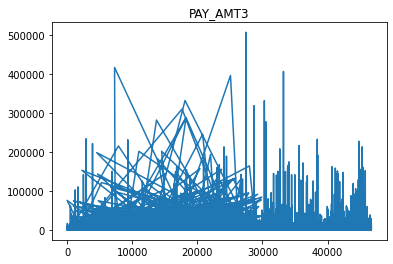

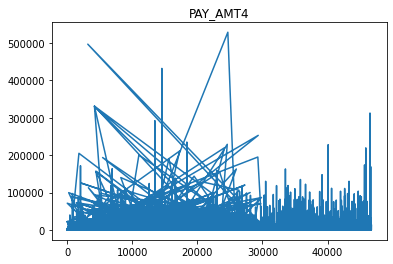

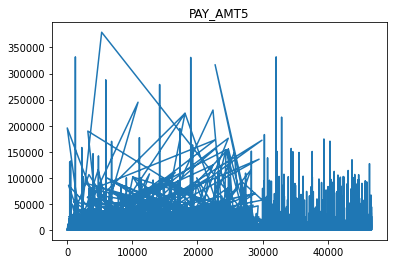

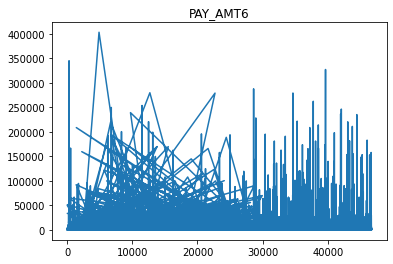

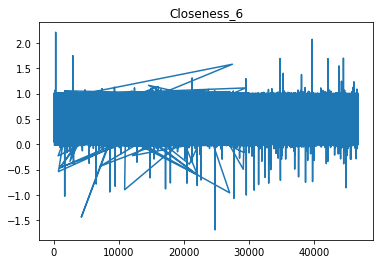

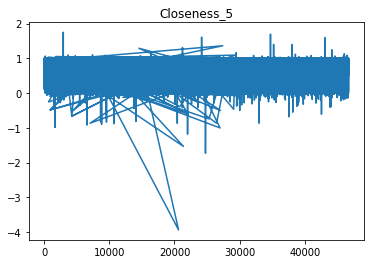

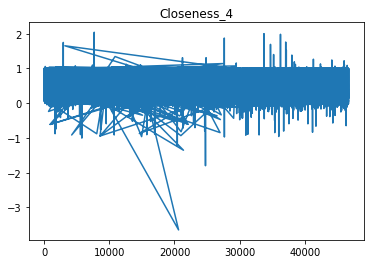

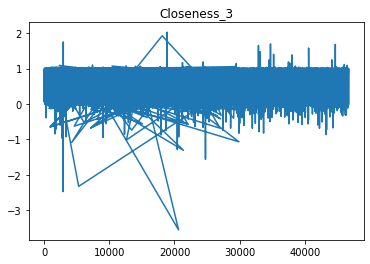

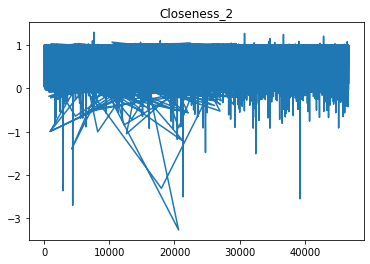

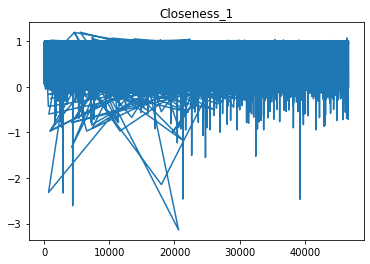

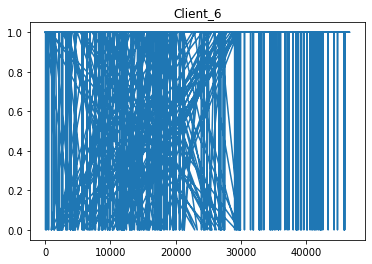

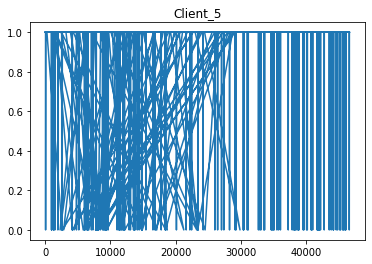

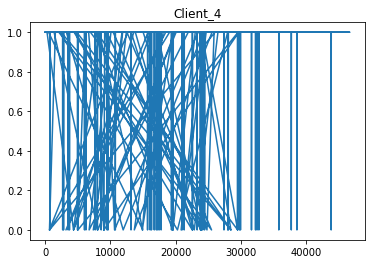

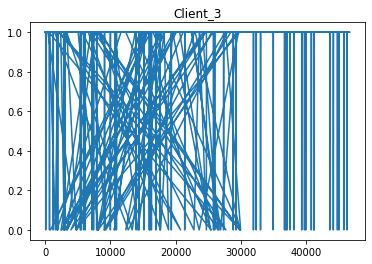

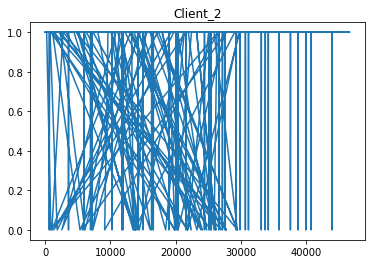

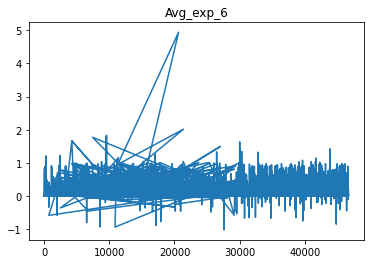

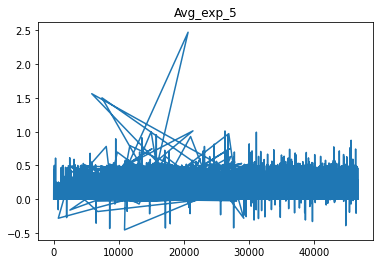

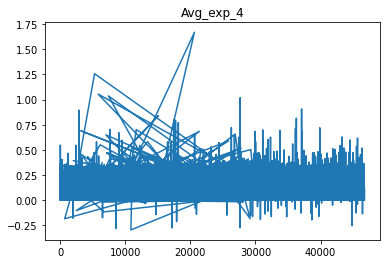

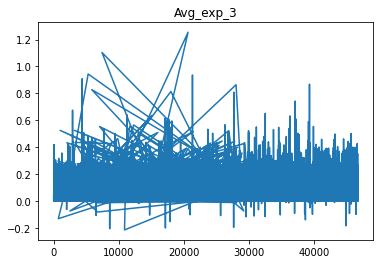

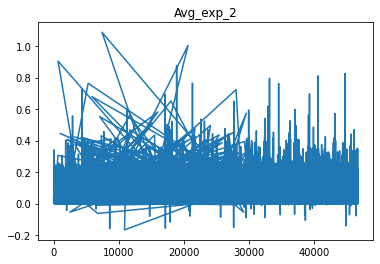

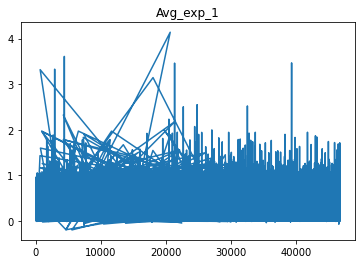

In [131]:
# figure out which of the nbe features are multimodal
for i in nbe_features:
  plt.title(i)
  plt.plot(df[i])
  plt.show()

In [132]:
def numerical_featuring_part_1(col, T0):
  mu = np.mean(col)
  sd = np.std(col)
  col.apply(lambda x: max(min((x-mu)/sd, T0), -T0))

def numerical_featuring_part_2(col):
  g, bins = pd.qcut(col, q=10, retbins=True, duplicates='drop')
  return pd.DataFrame(pd.qcut(col, q=10,labels=[i for i in np.arange(0,len(bins)-1)],duplicates='drop'))

def cat_featuring(col, l_max_perc):
  col[col.replace(Counter(col)) < len(col)*l_max_perc] = max(col)+1 #since 10 is not a possible value
  col = col.astype('category')
  return col.cat.codes

In [133]:
for i in nbe_features:
  numerical_featuring_part_1(df[i], 3) # set t0=3, as specified in the paper
  df[i] = numerical_featuring_part_2(df[i]) 

In [134]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,Client_4,Client_3,Client_2,Client_1,Avg_exp_6,Avg_exp_5,Avg_exp_4,Avg_exp_3,Avg_exp_2,Avg_exp_1
0,1.0,0,2.0,2.0,1.0,0,2.0,2.0,-1.0,-1.0,...,0,0,0,1,0,0,3,6,6,3
1,2.0,5,2.0,2.0,2.0,1,-1.0,2.0,0.0,0.0,...,0,0,0,1,1,2,1,1,1,2
13,14.0,3,1.0,2.0,2.0,2,1.0,2.0,2.0,0.0,...,0,0,0,1,4,9,9,8,8,8
16,17.0,0,1.0,1.0,2.0,0,0.0,0.0,2.0,2.0,...,0,0,0,1,6,5,5,5,5,6
21,22.0,5,2.0,2.0,1.0,6,-1.0,-1.0,-1.0,-1.0,...,0,0,0,1,2,1,1,1,1,1


In [135]:
#nbe is now categorical + old categorical 
all_categoricals = categorical_features + nbe_features

In [136]:
for i in all_categoricals:
  df[i] = cat_featuring(df[i], 0.01) # l_max is 1%, if a value occurs less than 1% of the time, change it to extreme value

<ipython-input-132-b042b036fb0f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[col.replace(Counter(col)) < len(col)*l_max_perc] = max(col)+1 #since 10 is not a possible value


In [137]:
df.to_csv('/content/drive/MyDrive/UPenn/*SENIOR_YEAR/classes/546/546 Project/data/ppppreprocessed.csv', index=False)